In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('Training_dataset_Original.csv')
leaderboard_dataset = pd.read_csv('Leaderboard_dataset.csv')

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset = dataset.iloc[:, 1:]  #Removing the ID column
leaderboard_dataset = leaderboard_dataset.iloc[:, 1:]

In [4]:
dataset.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,...,1,73.78,82.547,0.08696,10,0.63899,na,0,C,0
1,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,...,0,99.129,missing,0,13,0.63836,na,na,L,1
2,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,...,0,missing,29.29,0,1,1.00000,na,0,C,1
3,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,...,0,96.272,missing,0.15385,3,0.53241,0,0,L,0
4,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,...,0,115.019,missing,0,1,0.92665,na,na,L,0


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dataset.iloc[:, -2] = labelencoder.fit_transform(dataset.iloc[:, -2])
leaderboard_dataset.iloc[:, -1] = labelencoder.transform(leaderboard_dataset.iloc[:, -1])

In [6]:
#I will remove the garbage values here
for i in range(0, len(dataset.columns)):
    dataset.iloc[:, i] = pd.to_numeric(dataset.iloc[:, i], errors='coerce')

for i in range(0, len(leaderboard_dataset.columns)):
    leaderboard_dataset.iloc[:, i] = pd.to_numeric(leaderboard_dataset.iloc[:, i], errors='coerce')

In [7]:
leaderboard_dataset.head(20)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.5001,0.000,0.0000,0.0,206.0,19179.0,206.0,14221.0,19438.0,...,1.0,0.0,NaN,20.551,0.42105,3.0,0.85661,NaN,0.0,1
1,1894.0,1.9701,0.000,0.0000,0.0,297.0,19820.0,19820.0,176895.0,66346.0,...,3.0,0.0,NaN,63.047,0.00000,15.0,0.94391,0.0,0.0,0
2,1774.0,0.1718,0.000,0.0000,0.0,197.0,2563.0,877.0,8869.0,3637.0,...,1.0,0.0,NaN,83.797,0.33333,3.0,0.76467,0.0,0.0,0
3,1586.0,0.1123,5.299,0.0000,0.0,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,1.50000,0.0,NaN,NaN,NaN,0
4,1832.0,1.4442,0.000,0.0000,0.0,179.0,7577.0,179.0,21059.0,20306.0,...,3.0,0.0,96.052,66.665,0.00000,23.0,0.79190,0.0,0.0,1
5,1838.0,0.0544,0.241,0.0000,0.0,882.0,14039.0,10976.0,278941.0,74030.0,...,4.0,0.0,NaN,77.780,0.00000,21.0,0.92462,0.0,0.0,1
6,1743.0,1.0753,0.272,0.0000,0.0,397.0,16141.0,3568.0,69482.0,56755.0,...,6.0,0.0,NaN,67.159,0.00000,14.0,0.71347,0.0,0.0,1
7,1935.0,0.5601,0.000,0.0000,0.0,496.0,44919.0,17115.0,124814.0,124167.0,...,9.0,0.0,NaN,NaN,0.00000,15.0,0.92403,0.0,0.0,1
8,1885.0,0.0811,0.000,0.0000,0.0,7369.0,19264.0,19264.0,59956.0,26633.0,...,1.0,0.0,NaN,NaN,0.00000,5.0,0.89760,0.0,NaN,1
9,1730.0,0.7444,0.000,0.0000,0.0,0.0,2103.0,582.0,16429.0,9197.0,...,9.0,0.0,NaN,NaN,0.05882,14.0,0.40529,NaN,0.0,0


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_leaderboard = leaderboard_dataset.values

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

imputer2 = Imputer(missing_values='NaN', strategy='median', axis = 0)
imputer2 = imputer2.fit(X_leaderboard)
X_leaderboard = imputer2.transform(X_leaderboard)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

sc2 = StandardScaler()
X_leaderboard = sc2.fit_transform(X_leaderboard)

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.323999,-0.410544,-0.280746,-0.422674,...,-1.082226,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.368996,-0.634504,-0.620256,-0.452874,...,-0.576318,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.043052,1.416339,7.359761,0.294825,...,0.182544,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.305448,-0.433571,-0.470355,-0.324490,...,-0.323364,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.179532,-0.350652,-0.422692,-0.267643,...,-0.576318,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801


In [13]:
pd.DataFrame(X_leaderboard).head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.068811,-0.359992,-0.492659,-0.273508,-0.185209,-0.347526,0.046203,-0.613793,-0.347368,-0.151834,...,-0.840287,-0.194155,0.023103,-3.969913,0.249359,-0.566648,0.644755,-0.154052,-0.240548,1.354662
1,1.603046,0.554389,-0.492659,-0.273508,-0.185209,-0.319030,0.058446,1.551498,3.004768,0.519854,...,-0.322141,-0.194155,0.023103,-0.976646,-0.886920,1.360202,1.017321,-0.154052,-0.240548,-0.738191
2,0.297314,-0.564203,-0.492659,-0.273508,-0.185209,-0.350344,-0.271141,-0.539718,-0.457654,-0.378092,...,-0.840287,-0.194155,0.023103,0.484910,0.012631,-0.566648,0.252388,-0.154052,-0.240548,-0.738191
3,-1.748332,-0.601214,0.008230,-0.273508,-0.185209,-0.319030,-0.186180,-0.360216,-0.350438,-0.430172,...,-0.840287,-0.194155,0.023103,0.155690,3.161099,-1.048361,0.116122,-0.154052,-0.240548,-0.738191
4,0.928418,0.227264,-0.492659,-0.273508,-0.185209,-0.355980,-0.175380,-0.616774,-0.206461,-0.139405,...,-0.322141,-0.194155,-0.253789,-0.721807,-0.886920,2.644769,0.368596,-0.154052,-0.240548,1.354662


<h1> Now we evaluate the correlation between the various variables </h1>

In [15]:
copy_of_yTrain = y_train

In [16]:
copy_of_yTrain = copy_of_yTrain.reshape(copy_of_yTrain.shape[0], 1)

<h5>comparison_data matrix is basically a the matrix which conatains both X_train and y_train</h5>

In [17]:
comparison_data  = np.append(X_train, copy_of_yTrain, axis = 1)

In [18]:
#I have created this so as to create a comparison through which we can acertain the correlation
pd.DataFrame(comparison_data).head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.323999,-0.410544,-0.280746,-0.422674,...,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028,0.0
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.368996,-0.634504,-0.620256,-0.452874,...,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028,1.0
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.043052,1.416339,7.359761,0.294825,...,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028,0.0
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.305448,-0.433571,-0.470355,-0.324490,...,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801,0.0
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.179532,-0.350652,-0.422692,-0.267643,...,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801,0.0


In [19]:
#Heatmap using sns
correlation_inTrainData = pd.DataFrame(comparison_data).corr()
correlation_inTrainData

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.000000,-0.256554,-0.497848,-0.265856,-0.237197,0.393699,0.260846,0.553525,0.512338,0.410805,...,-0.219203,-0.143782,-0.119320,-0.699958,0.433874,0.009460,-0.127192,-0.250863,0.274378,-0.404170
1,-0.256554,1.000000,0.121840,0.089344,0.040772,-0.142523,-0.089314,-0.176287,-0.152337,-0.118662,...,0.054027,0.050847,0.080305,0.129834,0.021201,-0.087889,0.004731,0.085934,-0.084562,0.229114
2,-0.497848,0.121840,1.000000,0.373998,0.654431,-0.126253,-0.083611,-0.192157,-0.198761,-0.144501,...,0.110291,0.121066,0.029671,0.435284,-0.246054,-0.011044,0.115447,0.340114,-0.120513,0.196812
3,-0.265856,0.089344,0.373998,1.000000,0.100171,-0.072404,-0.044099,-0.106300,-0.114006,-0.072505,...,0.112232,0.056163,-0.005557,0.209151,-0.129180,0.001194,0.059124,0.894408,-0.070878,0.140317
4,-0.237197,0.040772,0.654431,0.100171,1.000000,-0.049277,-0.045435,-0.073455,-0.084494,-0.070896,...,0.046887,0.100801,0.024933,0.235179,-0.130992,-0.054741,-0.004321,0.094592,-0.053207,0.088565
5,0.393699,-0.142523,-0.126253,-0.072404,-0.049277,1.000000,0.199463,0.505918,0.269490,0.245352,...,-0.062130,-0.041849,-0.039592,-0.218168,0.021918,0.108208,-0.037870,-0.063906,0.132096,-0.162628
6,0.260846,-0.089314,-0.083611,-0.044099,-0.045435,0.199463,1.000000,0.344469,0.285223,0.888952,...,-0.009507,-0.034593,-0.086051,-0.174986,0.129362,0.029738,0.015771,-0.042330,0.053357,-0.114099
7,0.553525,-0.176287,-0.192157,-0.106300,-0.073455,0.505918,0.344469,1.000000,0.588297,0.461785,...,-0.083601,-0.066087,-0.078536,-0.333116,0.242665,0.049203,-0.056943,-0.094352,0.167371,-0.220035
8,0.512338,-0.152337,-0.198761,-0.114006,-0.084494,0.269490,0.285223,0.588297,1.000000,0.496690,...,-0.061157,-0.072566,-0.101269,-0.372167,0.476465,-0.014844,-0.036573,-0.102336,0.171630,-0.210060
9,0.410805,-0.118662,-0.144501,-0.072505,-0.070896,0.245352,0.888952,0.461785,0.496690,1.000000,...,-0.020839,-0.067418,-0.137136,-0.294836,0.312297,-0.018084,0.000274,-0.068672,0.100121,-0.170165


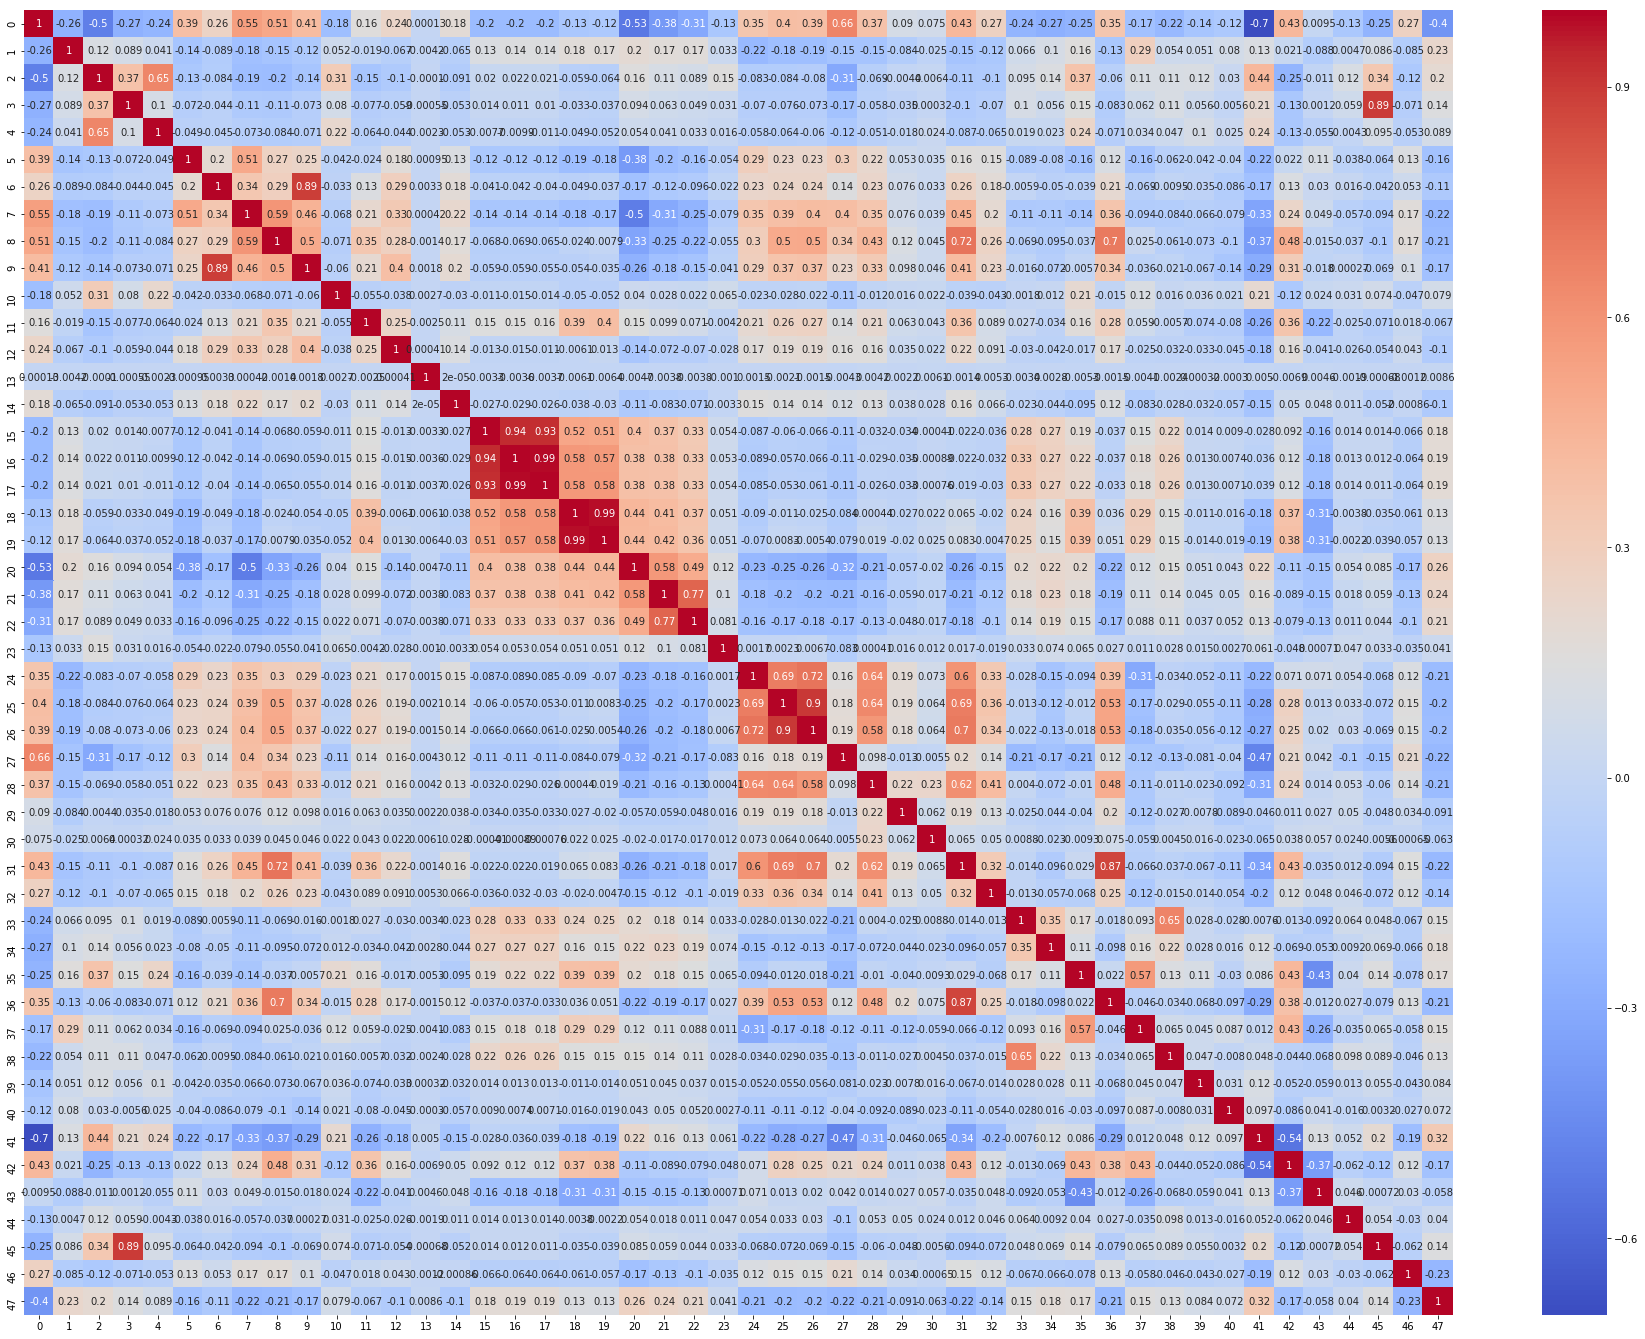

In [20]:
plt.subplots(figsize=(32,24))
sns.heatmap(correlation_inTrainData, cmap='coolwarm', annot=True)

<h2> Now here I am going to check some other correlation between the data </h2>

<h4> Removing mvar14 and mvar24 which represented the annual income from X_train and X_test</h4>

In [14]:
X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

In [15]:
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

In [16]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd.fit(X_train[:, [6,9]])

svd_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd_lBoard.fit(X_leaderboard[:, [6,9]])

X_train[:, [6,9]] = svd.transform(X_train[:, [6,9]])
X_test[:, [6,9]] = svd.transform(X_test[:, [6,9]])
X_leaderboard[:, [6,9]] = svd_lBoard.transform(X_leaderboard[:, [6,9]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]]

In [17]:
svd2 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2.fit(X_train[:, [13, 14, 15]])

svd2_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd2_lBoard.fit(X_leaderboard[:, [13, 14, 15]])

X_train[:, [13, 14, 15]] = svd2.transform(X_train[:, [13, 14, 15]])
X_test[:, [13, 14, 15]] = svd2.transform(X_test[:, [13, 14, 15]])
X_leaderboard[:, [13, 14, 15]] = svd2_lBoard.transform(X_leaderboard[:, [13, 14, 15]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]

In [18]:
svd3 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3.fit(X_train[:, [14, 15]])

svd3_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd3_lBoard.fit(X_leaderboard[:, [14, 15]])

X_train[:, [14, 15]] = svd3.transform(X_train[:, [14, 15]])
X_test[:, [14, 15]] = svd3.transform(X_test[:, [14, 15]])
X_leaderboard[:, [14, 15]] = svd3_lBoard.transform(X_leaderboard[:, [14, 15]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]]

In [19]:
svd4 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4.fit(X_train[:, [16, 17]])

svd4_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd4_lBoard.fit(X_leaderboard[:, [16, 17]])

X_train[:, [16, 17]] = svd4.transform(X_train[:, [16, 17]])
X_test[:, [16, 17]] = svd4.transform(X_test[:, [16, 17]])
X_leaderboard[:, [16, 17]] = svd4_lBoard.transform(X_leaderboard[:, [16, 17]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]

In [20]:
svd5 = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5.fit(X_train[:, [17, 18, 19]])

svd5_lBoard = decomposition.TruncatedSVD(n_components=1, algorithm='arpack')
svd5_lBoard.fit(X_leaderboard[:, [17, 18, 19]])

X_train[:, [17, 18, 19]] = svd5.transform(X_train[:, [17, 18, 19]])
X_test[:, [17, 18, 19]] = svd5.transform(X_test[:, [17, 18, 19]])
X_leaderboard[:, [17, 18, 19]] = svd5_lBoard.transform(X_leaderboard[:, [17, 18, 19]])

X_train = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_test = X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_leaderboard = X_leaderboard[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]

In [21]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.290048,0.311423,-0.486601,-0.263285,-0.186988,-0.150867,-0.527733,-0.410544,-0.280746,-0.174138,...,-1.082226,-0.207894,0.023551,0.152566,0.900481,-0.881582,0.490171,-0.160451,-0.232353,-0.737028
1,-1.188651,-0.491874,-0.207604,-0.263285,-0.186988,-0.387570,-0.580941,-0.634504,-0.620256,-0.174138,...,-0.576318,-0.207894,0.023551,0.152566,0.003765,-0.881582,1.247076,-0.160451,-0.232353,-0.737028
2,1.821129,-0.658783,-0.486601,-0.263285,-0.186988,3.222066,0.238299,1.416339,7.359761,-0.174138,...,0.182544,-0.207894,-6.729958,0.152566,-0.892924,1.506709,1.154157,-0.160451,-0.232353,-0.737028
3,0.327065,-0.618813,-0.486601,-0.263285,-0.186988,0.165345,-0.445385,-0.433571,-0.470355,-0.174138,...,-0.323364,-0.207894,0.023551,0.152566,-0.444566,-0.085485,1.228389,-0.160451,-0.232353,1.356801
4,0.099708,-0.669074,-0.336907,0.209075,-0.186988,0.393518,-0.315983,-0.350652,-0.422692,-0.240391,...,-0.576318,-0.207894,1.688152,-2.254820,-0.764822,-0.244704,-0.660173,-0.160451,-0.232353,1.356801


<h3> Now I am going to remove some variables in this section by using the relevances using Random Forest Classifier </h3>

**Now as we can see in Analyze_This3 we delete columns 2,22,31,32,35,36**

In [22]:
X_train = np.delete(X_train, [3,22,31,32,35,36], 1)
X_leaderboard = np.delete(X_leaderboard, [3,22,31,32,35,36], 1)
X_test = np.delete(X_test, [3,22,31,32,35,36], 1)

In [23]:
X_train.shape

(60000, 32)

<h3> So here I am goin to train using K nearest Neighbour </h3>

In [30]:
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

In [31]:
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [32]:
y_pred_test = classifier.predict(X_test)

In [33]:
j = 0
for i in y_pred_test:
    if i > 0.5:
        y_pred_test[j] = 1
    else:
        y_pred_test[j] = 0
    j = j + 1
    
mean_squared_error(y_test, y_pred_test)

0.224

<h3> Now here I am going to use ANN with Dropout </h3>

In [24]:
#Now I am going to create a new X_train and y_train containing all the data points
X_train = np.append(X_train, X_test, axis=0)
y_train = np.append(y_train, y_test, axis=0)

In [25]:
X_train.shape

(80000, 32)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm

Using TensorFlow backend.


In [27]:
X_train.shape

(80000, 32)

In [112]:
classifier = Sequential()
#classifier.add(Dropout(rate=0.2, input_shape=(38,)))
classifier.add(Dense(output_dim=21, init='uniform', activation='relu', input_dim=32))
#classifier.add(Dropout(rate = 0.2, input_shape = (23,)))
classifier.add(Dense(output_dim=15, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=9, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=5, init='uniform', activation='relu'))
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=32, units=21, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="uniform")`
  """
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
  
/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=5, kernel_initializer="uniform")`
  import sys
/home/aniket/.conda/envs/fastai/lib/python3.

In [113]:
classifier.fit(X_train, y_train, nb_epoch = 50)

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
80000/80000 [==============================] - 4s 51us/step - loss: 0.4404 - acc: 0.7920
Epoch 2/50
80000/80000 [==============================] - 3s 43us/step - loss: 0.4214 - acc: 0.7995
Epoch 3/50
80000/80000 [==============================] - 4s 45us/step - loss: 0.4197 - acc: 0.7999
Epoch 4/50
80000/80000 [==============================] - 3s 41us/step - loss: 0.4180 - acc: 0.8026
Epoch 5/50
80000/80000 [==============================] - 3s 37us/step - loss: 0.4164 - acc: 0.8043
Epoch 6/50
80000/80000 [==============================] - 3s 37us/step - loss: 0.4156 - acc: 0.8052
Epoch 7/50
80000/80000 [==============================] - 3s 37us/step - loss: 0.4145 - acc: 0.8060
Epoch 8/50
80000/80000 [==============================] - 3s 39us/step - loss: 0.4137 - acc: 0.8063
Epoch 9/50
80000/80000 [==============================] - 3s 43us/step - loss: 0.4128 - acc: 0.8070
Epoch 10/50
80000/80000 [==============================] - 3s 43us/step - loss: 0.4122 - acc: 0.8071

In [114]:
y_pred_test = classifier.predict(X_test)

In [115]:
y_pred_test_copy = y_pred_test
j = 0
for i in y_pred_test_copy:
    if i > 0.5:
        y_pred_test_copy[j] = 1
    else:
        y_pred_test_copy[j] = 0
    j = j+1

mean_squared_error(y_test, y_pred_test)

0.1834

<h3> Here I am going to use XGBoost </h3>

In [82]:
import xgboost

In [83]:
for i in np.arange(5,10,1):
    classifier = xgboost.XGBRegressor(n_estimators = 100, max_depth=i, learning_rate=0.1)
    classifier.fit(X_train, y_train)
    y_pred_test = classifier.predict(X_test)
    j = 0
    for i in y_pred_test:
        if i > 0.5:
            y_pred_test[j] = 1
        else:
            y_pred_test[j] = 0
        j = j + 1

    print(mean_squared_error(y_test, y_pred_test))

0.17235
0.16255
0.14615
0.1234
0.1016


In [98]:
classifier = xgboost.XGBRegressor(max_depth=9)
classifier.fit(X_train, y_train)
y_pred_test = classifier.predict(X_test)

In [143]:
j = 0
for i in y_pred_test:
    if i > 0.5:
        y_pred_test[j] = 1
    else:
        y_pred_test[j] = 0
    j = j + 1

mean_squared_error(y_test, y_pred_test)

0.18985

<h1> Now I am going to start working on the leaderboard dataset </h1>

In [116]:
y_pred_leaderboard = classifier.predict(X_leaderboard)

In [117]:
y_pred_leaderboard = y_pred_leaderboard.reshape(y_pred_leaderboard.shape[0], 1)
y_pred_leaderboard.shape

(25000, 1)

In [118]:
lead = pd.read_csv('Leaderboard_dataset.csv')
final_array = lead.iloc[:, 0].values

/home/aniket/.conda/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [119]:
final_array = final_array.reshape(final_array.shape[0], 1)

In [120]:
final_array.shape

(25000, 1)

In [121]:
final_array = np.append(final_array, y_pred_leaderboard, axis=1)

In [122]:
df = pd.DataFrame()
df = pd.DataFrame(final_array)

In [123]:
df

,0,1
0,350053.0,0.022380
1,350054.0,0.037314
2,350055.0,0.102140
3,350056.0,0.625700
4,350057.0,0.088343
5,350058.0,0.002322
6,350059.0,0.051069
7,350060.0,0.004084
8,350061.0,0.008496
9,350062.0,0.304958


In [124]:
df2 = df.sort_values([1])

In [125]:
df2

,0,1
22203,372256.0,0.000002
21128,371181.0,0.000004
11416,361469.0,0.000010
23338,373391.0,0.000010
21212,371265.0,0.000038
11401,361454.0,0.000039
13848,363901.0,0.000046
9740,359793.0,0.000087
20083,370136.0,0.000131
2771,352824.0,0.000135


In [126]:
j = 0
for i in df2.iloc[:, 1]:
    if i >0.4:
        df2.iloc[j, 1] = 1
    else:
        df2.iloc[j, 1] = 0
    j = j+1

In [127]:
df2

,0,1
22203,372256.0,0.0
21128,371181.0,0.0
11416,361469.0,0.0
23338,373391.0,0.0
21212,371265.0,0.0
11401,361454.0,0.0
13848,363901.0,0.0
9740,359793.0,0.0
20083,370136.0,0.0
2771,352824.0,0.0


In [128]:
df2.to_csv('Be_Professional_IITRoorkee_56.csv', index = False)